Import Library

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

Import dataset

In [144]:
df=pd.read_csv('NCR_rent.csv')
df.head()

,sl.no,price,Address,Location,area,Bedrooms,Bathrooms,Balcony,Status,new_or_old,parking,Furnished_status,Lift,type_of_building,Price_sqft,Police_Station_within_3kms,Malls_within_5kms,Schools_within_5kms,Metr_within_3kms
0,1,8800000,"Sector 79,Gurgaon, Delhi NCR","Gurgaon, Delhi NCR",1490,3,3,1,Ready to Move,New Property,0,Semi-Furnished,2,Flat,5906.040,No,No,Yes,No
1,2,16500000,"Vaishali, Ghaziabad, Delhi NCR","Ghaziabad, Delhi NCR",2385,4,5,1,Ready to Move,New Property,1,Unfurnished,0,Flat,6918.239,Yes,Yes,Yes,No
2,3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...","Greater Noida, Delhi NCR",1050,2,2,3,Under Construction,New Property,1,Unfurnished,2,Flat,3628.571,Yes,Yes,Yes,Yes
3,4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...","Noida, Delhi NCR",1350,2,2,3,Ready to Move,Resale,1,Semi-Furnished,3,Flat,4592.593,Yes,Yes,Yes,No
4,5,3700000,"tower 2, 6th floor, Crossings Republik, Ghazia...","Ghaziabad, Delhi NCR",1150,2,2,3,Ready to Move,New Property,1,Unfurnished,0,Flat,3217.391,No,Yes,Yes,No


In [145]:
df.drop('sl.no',axis=1,inplace=True)
df.head()

,price,Address,Location,area,Bedrooms,Bathrooms,Balcony,Status,new_or_old,parking,Furnished_status,Lift,type_of_building,Price_sqft,Police_Station_within_3kms,Malls_within_5kms,Schools_within_5kms,Metr_within_3kms
0,8800000,"Sector 79,Gurgaon, Delhi NCR","Gurgaon, Delhi NCR",1490,3,3,1,Ready to Move,New Property,0,Semi-Furnished,2,Flat,5906.040,No,No,Yes,No
1,16500000,"Vaishali, Ghaziabad, Delhi NCR","Ghaziabad, Delhi NCR",2385,4,5,1,Ready to Move,New Property,1,Unfurnished,0,Flat,6918.239,Yes,Yes,Yes,No
2,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...","Greater Noida, Delhi NCR",1050,2,2,3,Under Construction,New Property,1,Unfurnished,2,Flat,3628.571,Yes,Yes,Yes,Yes
3,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...","Noida, Delhi NCR",1350,2,2,3,Ready to Move,Resale,1,Semi-Furnished,3,Flat,4592.593,Yes,Yes,Yes,No
4,3700000,"tower 2, 6th floor, Crossings Republik, Ghazia...","Ghaziabad, Delhi NCR",1150,2,2,3,Ready to Move,New Property,1,Unfurnished,0,Flat,3217.391,No,Yes,Yes,No


Data Preprocessing

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       159 non-null    int64  
 1   Address                     159 non-null    object 
 2   Location                    159 non-null    object 
 3   area                        159 non-null    int64  
 4   Bedrooms                    159 non-null    int64  
 5   Bathrooms                   159 non-null    int64  
 6   Balcony                     159 non-null    int64  
 7   Status                      159 non-null    object 
 8   new_or_old                  159 non-null    object 
 9   parking                     159 non-null    int64  
 10  Furnished_status            159 non-null    object 
 11  Lift                        159 non-null    int64  
 12  type_of_building            159 non-null    object 
 13  Price_sqft                  159 non

In [147]:
df.shape

(159, 18)

In [148]:
df.corr()

<ipython-input-148-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
price,1.000000,0.845891,0.629708,0.694444,0.243437,0.583617,0.148260,0.671637
area,0.845891,1.000000,0.814102,0.862186,0.452689,0.735590,0.070361,0.346146
Bedrooms,0.629708,0.814102,1.000000,0.832605,0.398261,0.664671,-0.028345,0.265330
Bathrooms,0.694444,0.862186,0.832605,1.000000,0.401331,0.656151,0.024932,0.280150
Balcony,0.243437,0.452689,0.398261,0.401331,1.000000,0.493526,0.307844,-0.034772
parking,0.583617,0.735590,0.664671,0.656151,0.493526,1.000000,0.111190,0.265075
Lift,0.148260,0.070361,-0.028345,0.024932,0.307844,0.111190,1.000000,0.116100
Price_sqft,0.671637,0.346146,0.265330,0.280150,-0.034772,0.265075,0.116100,1.000000


In [149]:
df['Balcony'].value_counts()

1     60
3     44
2     41
4     12
5      1
10     1
Name: Balcony, dtype: int64

In [150]:
df['Status'].value_counts()

Ready to Move         146
Under Construction     13
Name: Status, dtype: int64

In [151]:
df['Location'].value_counts()

Gurgaon, Delhi NCR               45
Noida, Delhi NCR                 44
Ghaziabad, Delhi NCR             30
New Delhi - West, Delhi NCR      10
New Delhi - South, Delhi NCR      8
New Delhi - Dwarka, Delhi NCR     7
Faridabad, Delhi NCR              5
Rohini, Delhi NCR                 4
New Delhi - East, Delhi NCR       3
Greater Noida, Delhi NCR          2
Gurgaon - South, Delhi NCR        1
Name: Location, dtype: int64

In [152]:
df['area'].value_counts()

1000    6
1200    5
1250    4
1050    4
1350    4
       ..
1300    1
1685    1
2411    1
1689    1
1530    1
Name: area, Length: 110, dtype: int64

In [153]:
df['Furnished_status'].value_counts()

Semi-Furnished    79
Unfurnished       70
Furnished         10
Name: Furnished_status, dtype: int64

In [154]:
df.describe()

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,1.590000e+02,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,9.973962e+06,1580.113208,2.748428,2.559748,2.119497,1.295597,0.924528,5795.765013
std,1.056590e+07,1019.116315,0.974150,1.040881,1.187300,0.868240,1.150383,2327.800265
min,2.400000e+06,540.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2893.130000
25%,4.410000e+06,1040.500000,2.000000,2.000000,1.000000,1.000000,0.000000,4079.590000
50%,7.400000e+06,1310.000000,3.000000,2.000000,2.000000,1.000000,0.000000,5000.000000
75%,1.220000e+07,1800.000000,3.000000,3.000000,3.000000,1.000000,2.000000,6804.139500
max,8.200000e+07,9000.000000,10.000000,10.000000,10.000000,10.000000,5.000000,14922.660000


In [155]:
df.isnull().sum()

price                         0
Address                       0
Location                      0
area                          0
Bedrooms                      0
Bathrooms                     0
Balcony                       0
Status                        0
new_or_old                    0
parking                       0
Furnished_status              0
Lift                          0
type_of_building              0
Price_sqft                    0
Police_Station_within_3kms    0
Malls_within_5kms             0
Schools_within_5kms           0
Metr_within_3kms              0
dtype: int64

In [156]:
#There are no non null values in the dataset

Data Visualisation

Text(0.5, 1.0, 'Status')

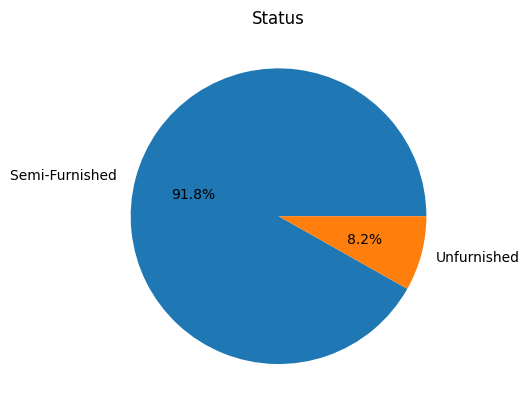

In [157]:
plt.pie(df.Status.value_counts(),labels=['Semi-Furnished ','Unfurnished'],autopct='%1.1f%%')
plt.title("Status")

Text(0.5, 1.0, 'Furnished status')

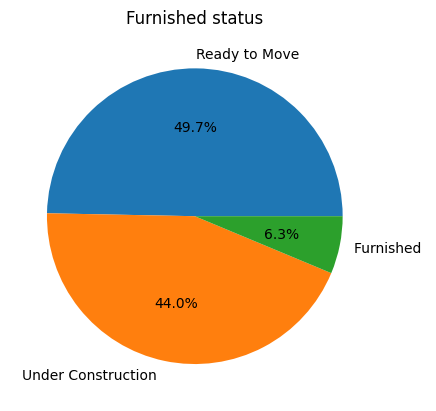

In [158]:
plt.pie(df.Furnished_status.value_counts(),labels=['Ready to Move','Under Construction ','Furnished '],autopct='%1.1f%%')
plt.title("Furnished status")

Text(0.5, 1.0, 'Location')

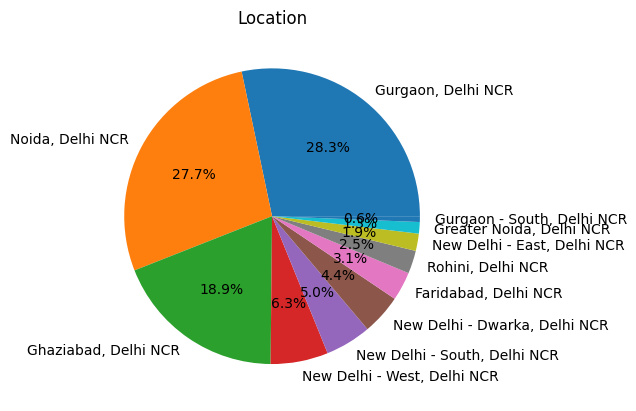

In [159]:
plt.pie(df.Location.value_counts(),labels=['Gurgaon, Delhi NCR','Noida, Delhi NCR','Ghaziabad, Delhi NCR','New Delhi - West, Delhi NCR','New Delhi - South, Delhi NCR',
             'New Delhi - Dwarka, Delhi NCR','Faridabad, Delhi NCR','Rohini, Delhi NCR ','New Delhi - East, Delhi NCR',
             'Greater Noida, Delhi NCR','Gurgaon - South, Delhi NCR'],autopct='%1.1f%%')
plt.title("Location")

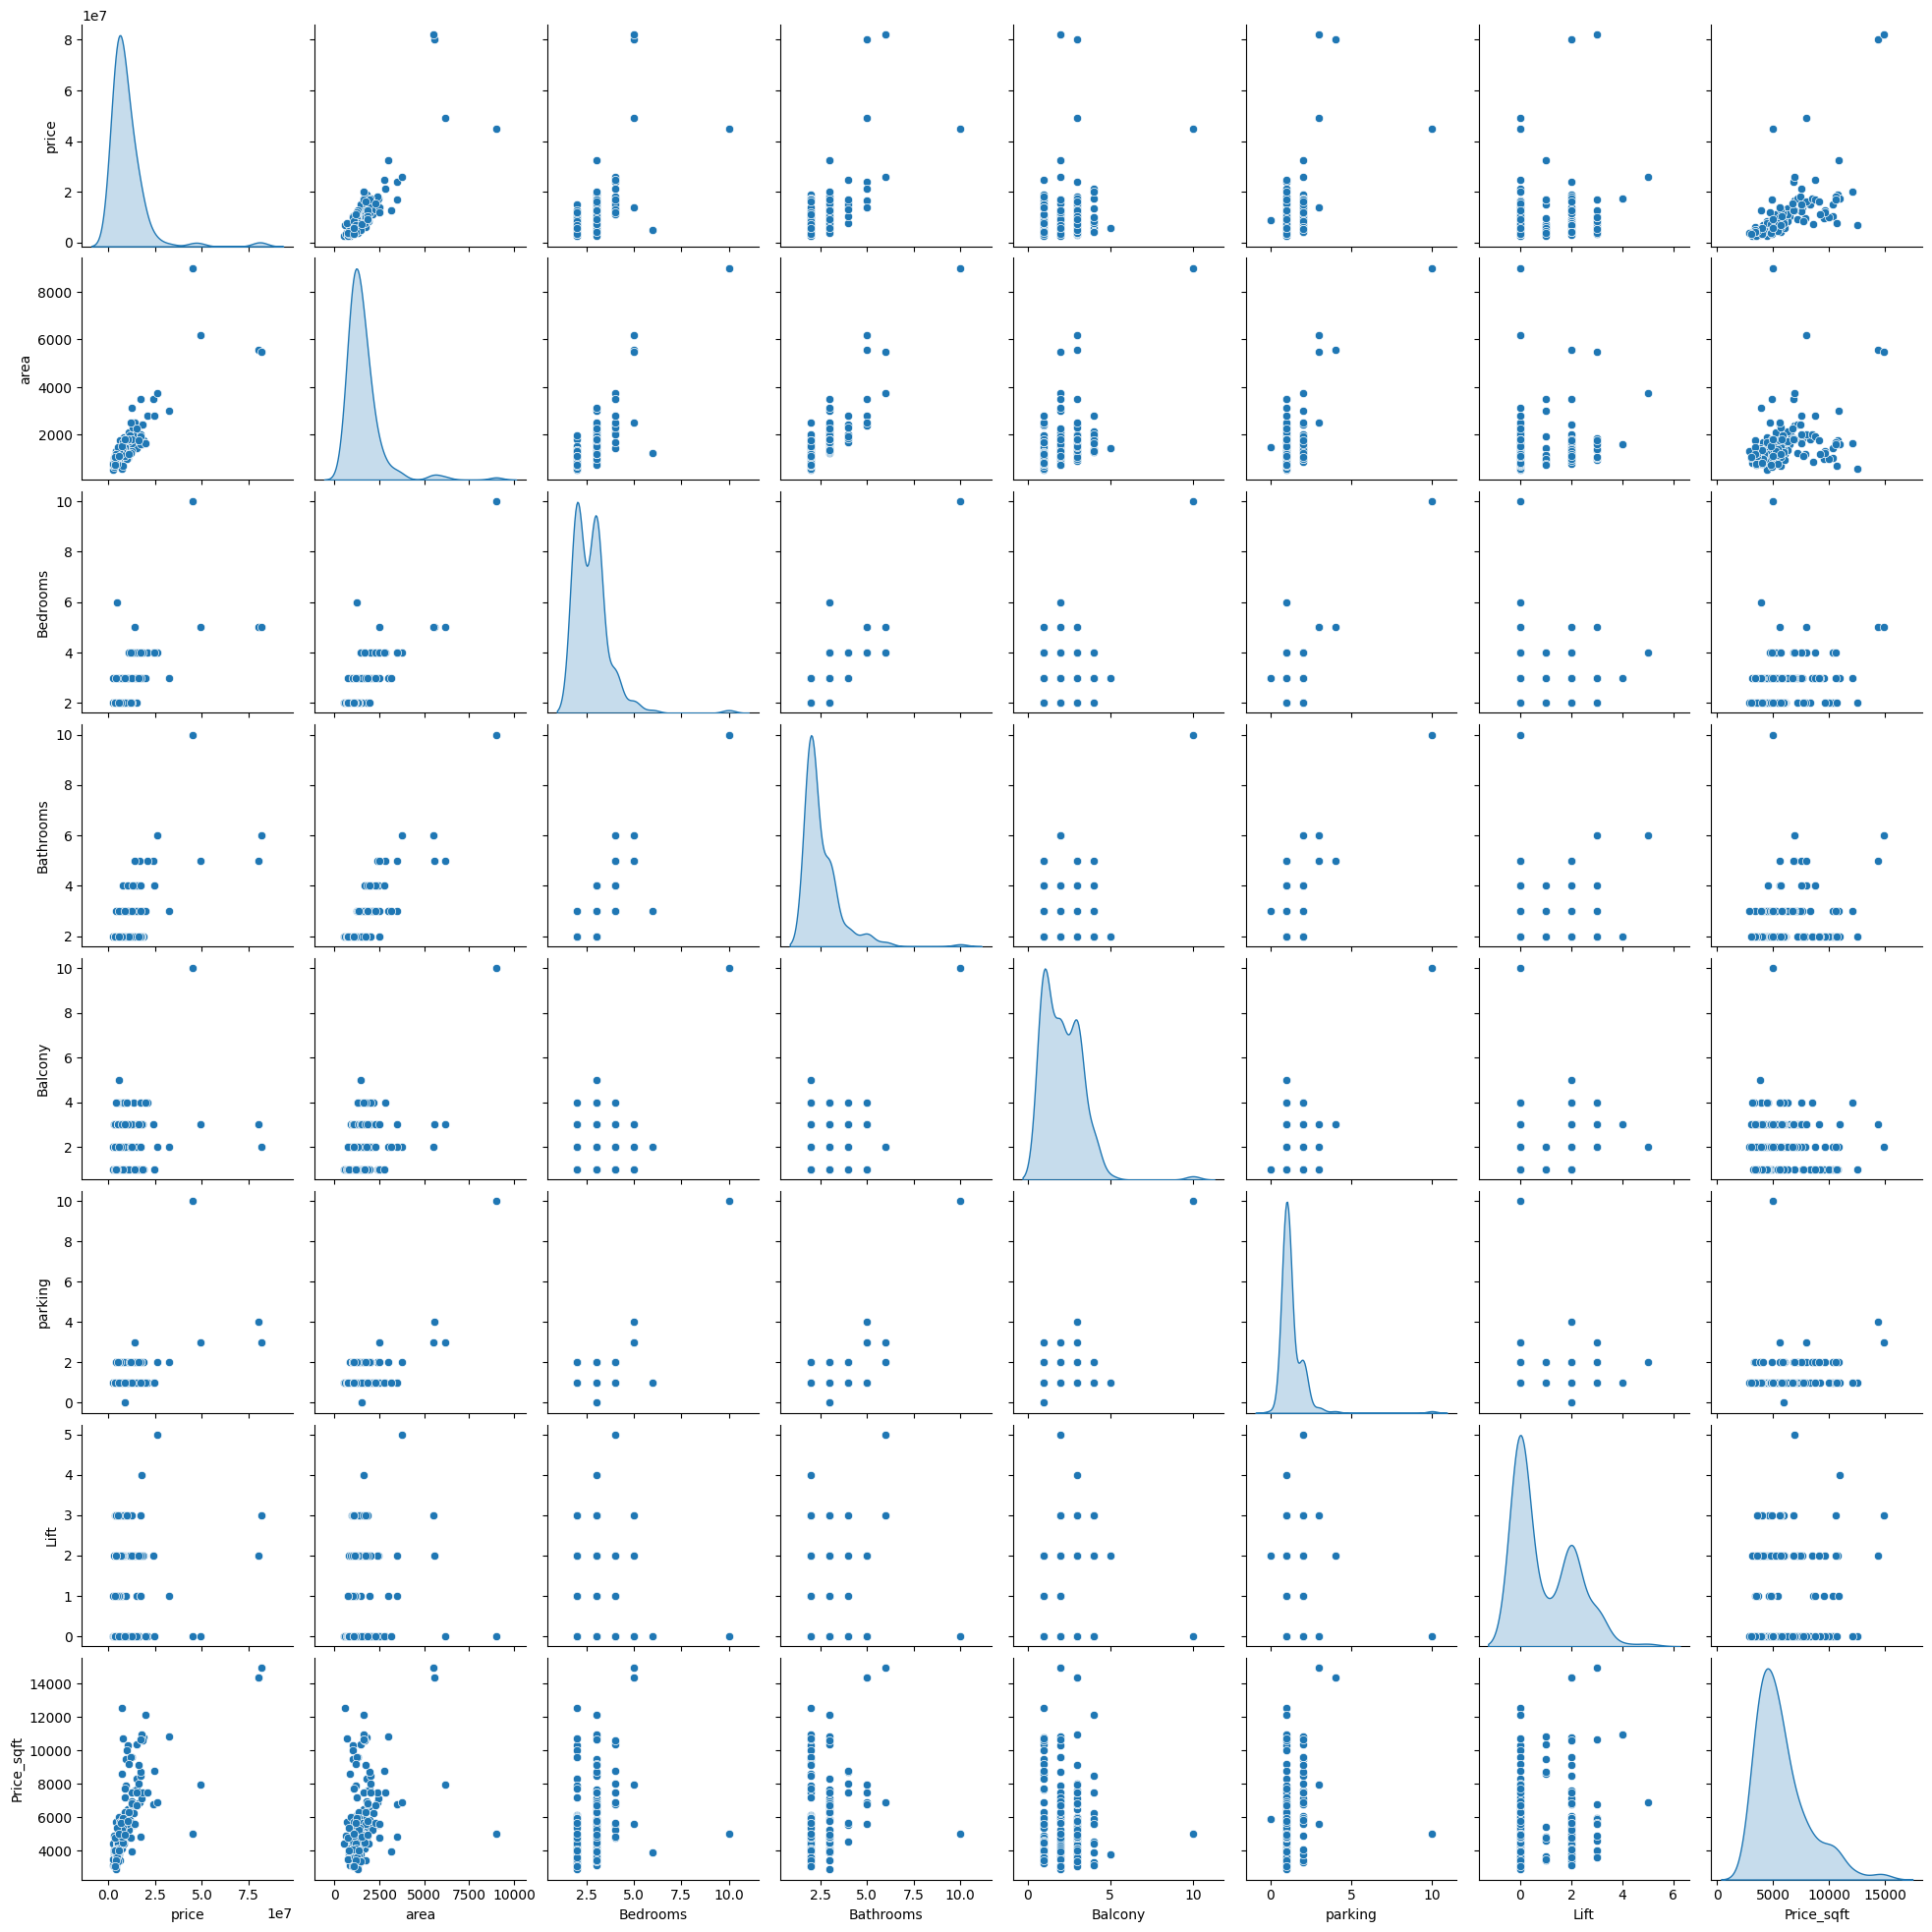

In [160]:
sns.pairplot(df, diag_kind='kde')
plt.show()

<ipython-input-161-fa79d7540cf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'Blues')


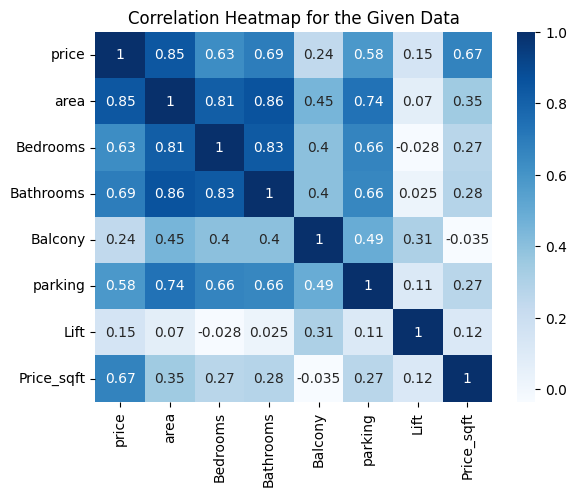

In [161]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

plt.title('Correlation Heatmap for the Given Data')
plt.show()

<ipython-input-162-f6ff0fc8ac07>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.lineplot(df.corr()['price'])


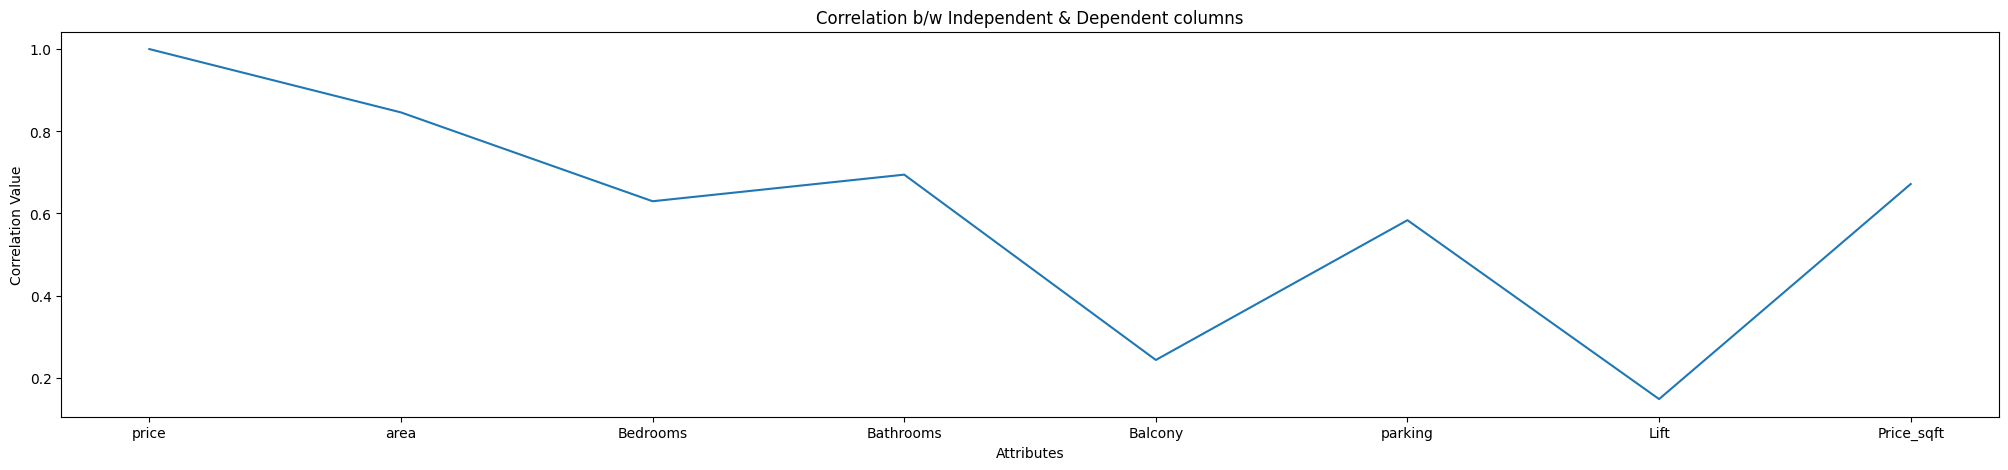

In [162]:
plt.figure(figsize = [25, 5])

sns.lineplot(df.corr()['price'])

plt.xlabel('Attributes')
plt.ylabel('Correlation Value')
plt.title('Correlation b/w Independent & Dependent columns')
plt.show()

Label Encoding

In [163]:
le =LabelEncoder()
df.Location=le.fit_transform(df.Location)
df.Status=le.fit_transform(df.Status)
df.new_or_old=le.fit_transform(df.new_or_old)
df.Furnished_status=le.fit_transform(df.Furnished_status)
df.type_of_building=le.fit_transform(df.type_of_building)
df.Police_Station_within_3kms=le.fit_transform(df.Police_Station_within_3kms)
df.Malls_within_5kms=le.fit_transform(df.Malls_within_5kms)
df.Schools_within_5kms =le.fit_transform(df.Schools_within_5kms )
df.Metr_within_3kms=le.fit_transform(df.Metr_within_3kms)
df.head()

,price,Address,Location,area,Bedrooms,Bathrooms,Balcony,Status,new_or_old,parking,Furnished_status,Lift,type_of_building,Price_sqft,Police_Station_within_3kms,Malls_within_5kms,Schools_within_5kms,Metr_within_3kms
0,8800000,"Sector 79,Gurgaon, Delhi NCR",4,1490,3,3,1,0,0,0,1,2,0,5906.040,0,0,1,0
1,16500000,"Vaishali, Ghaziabad, Delhi NCR",1,2385,4,5,1,0,0,1,2,0,0,6918.239,2,1,1,0
2,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",2,1050,2,2,3,1,0,1,2,2,0,3628.571,2,1,1,1
3,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",9,1350,2,2,3,0,1,1,1,3,0,4592.593,2,1,1,0
4,3700000,"tower 2, 6th floor, Crossings Republik, Ghazia...",1,1150,2,2,3,0,0,1,2,0,0,3217.391,0,1,1,0


Data Cleaning

Text(0.5, 1.0, 'Box Plot of All Columns')

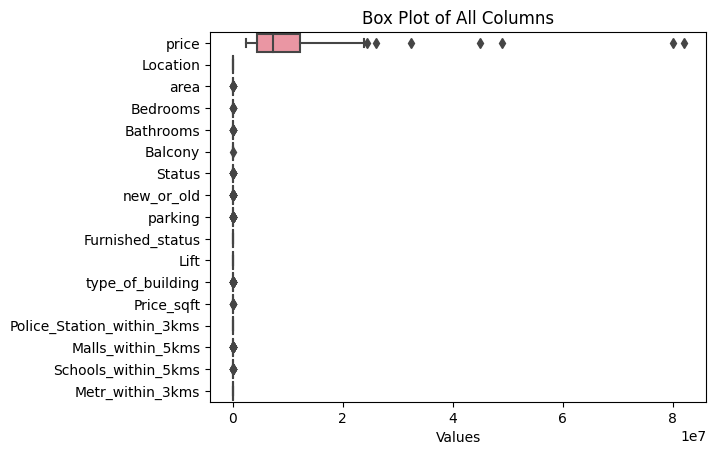

In [164]:
sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

Text(0.5, 1.0, 'Box Plot of All Columns')

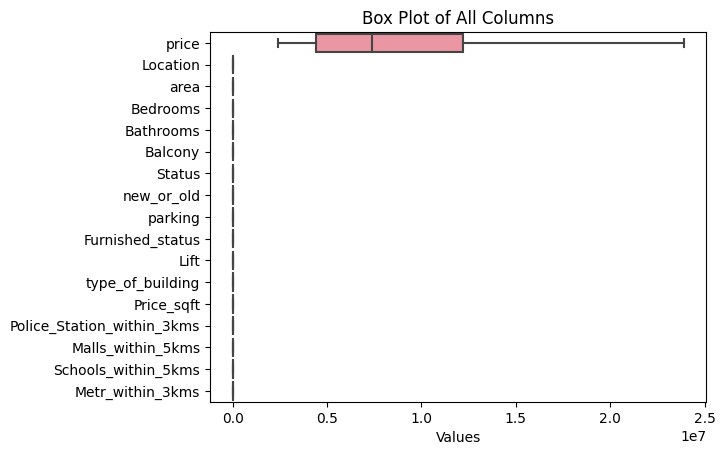

In [165]:
#removing outliners
l1=["price","area","Bedrooms","Bathrooms","Balcony","Status","new_or_old","parking","Lift","type_of_building","Price_sqft","Police_Station_within_3kms","Malls_within_5kms",
    "Schools_within_5kms","Metr_within_3kms"]
data=df
for i in l1:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    data[i]=np.where(data[i]>upperL,upperL,np.where(data[i]<lowerL,lowerL,data[i]))


sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

X and Y splitting

In [166]:
X = df.drop(columns = ['price','Address'], axis = 1)
X.head()

,Location,area,Bedrooms,Bathrooms,Balcony,Status,new_or_old,parking,Furnished_status,Lift,type_of_building,Price_sqft,Police_Station_within_3kms,Malls_within_5kms,Schools_within_5kms,Metr_within_3kms
0,4,1490.0,3.0,3.0,1.0,0.0,1.0,1.0,1,2.0,0.0,5906.040,0.0,1.0,1.0,0.0
1,1,2385.0,4.0,4.5,1.0,0.0,1.0,1.0,2,0.0,0.0,6918.239,2.0,1.0,1.0,0.0
2,2,1050.0,2.0,2.0,3.0,0.0,1.0,1.0,2,2.0,0.0,3628.571,2.0,1.0,1.0,1.0
3,9,1350.0,2.0,2.0,3.0,0.0,1.0,1.0,1,3.0,0.0,4592.593,2.0,1.0,1.0,0.0
4,1,1150.0,2.0,2.0,3.0,0.0,1.0,1.0,2,0.0,0.0,3217.391,0.0,1.0,1.0,0.0


In [167]:
y=df.price
y.head()

0     8800000.0
1    16500000.0
2     3810000.0
3     6200000.0
4     3700000.0
Name: price, dtype: float64

In [168]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [169]:
x_train.shape

(119, 16)

In [170]:
x_test.shape

(40, 16)

Linear Regression

In [171]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [172]:
y_pred=lr.predict(x_test)
y_pred

array([ 2643327.15332422,  2898878.00684841,  8979140.527796  ,
        7486910.2843507 ,  4884890.27234659,  6278454.10434391,
       10789353.04273793, 12468381.91448443, 13926391.67752442,
        3811621.25135308, 16564407.58619182, 15693798.4211946 ,
        7294364.1154833 ,  3782886.63366816,  5176577.12443267,
        4269167.00884696, 11617152.64821844, 11355904.0362719 ,
       11766485.36315417,  9667737.26630338, 16445011.37474108,
       10559043.51192427,  2462873.55577937,  2603002.87719919,
       20078644.14179418,  7302826.7004675 ,  4401885.4366552 ,
       12684738.55083023,  7985434.0017543 ,  7003970.11516397,
        6418839.34712559,  2397263.09155186,  3366788.18377895,
        5271480.72504309,  4596071.67292138, 14022664.05353377,
       16695845.03279263, 14057772.25555733,  9924137.93945172,
       11744126.18265343])

In [173]:
model1Accuracy=r2_score(y_test,y_pred)
model1Accuracy

0.9344119082782917

In [174]:
lr.predict([[4,	1490.0,	3.0,	3.0,	1.0,	0.0,	1.0	,1.0	,1	,2.0,	0.0	,5906.040	,0.0,	1.0	,1.0	,0.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8978569.41282293])

Gradient Boosting Regressor

In [175]:
gd_model = GradientBoostingRegressor()
gd_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [176]:
y_prediction2 = gd_model.predict(x_test)

In [177]:
model2accuracy=r2_score(y_test,y_prediction2)
model2accuracy

0.9404869411252852

In [178]:
gd_model.predict([[4,	1490.0,	3.0,	3.0,	1.0,	0.0,	1.0	,1.0	,1	,2.0,	0.0	,5906.040	,0.0,	1.0	,1.0	,0.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([8690916.66606279])

Decision Tree Regressor

In [179]:
tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [180]:
y_prediction3 = tree_model.predict(x_test)

In [181]:
model3accuracy=r2_score(y_test,y_prediction3)
model3accuracy

0.9513888110599404

In [182]:
tree_model.predict([[4,	1490.0,	3.0,	3.0,	1.0,	0.0,	1.0	,1.0	,1	,2.0,	0.0	,5906.040	,0.0,	1.0	,1.0	,0.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([8800000.])